<p>Our Dataset is composed of mental health and frequency of mental health disorders in the tech workplace.</p>
<h2>Question to responde:</h2>
<h3>Taking treatment for a mental health condition?</h3>
<p>1. What are the most influencing features?</p>
<p>2. In this dataset is able to response if a person is talking a treatment or not?</p>
<h4>The Dataset:</h4>
<p>Size: 1259 rows e 27 features</p>
<ul>
    <li>Yes:50.595711</li>
    <li>No:49.404289</li>
</ul>
<p> The model is going to be train and an API in going to be available to test new cases.</p>
    


## Data set Mental Health in TI

<p>"This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace."(From Kanggle)</p>
<p> link: <a href="https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey?resource=download&select=survey.csv">Data source Kanggle</a></p>
<p>Version 2.0 - 12/10/2022</p>

In [68]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [69]:
# Panda configuration
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Matplotlib configuration
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

## 1 Data Collection

In [2]:
# Lendo arquivo
df = pd.read_csv("data/survey.csv")

## 2 Data Understanding

In [3]:
df.shape

(1259, 27)

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
#Tipos das colunas
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [6]:
#Soma nulos por Coluna
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
# Soma todos os NaN do dataset
df.isna().sum().sum()

1892

## 3 Data Preparation

### Dealing with missing values
<p>Missing values in columns</p>
<ul>
<li>state - 515</li>
<li>self_employed - 18</li>
<li>work_interfere - 264</li>
<li>comments - 1095</li>
</ul>



#### Dropping Columns

In [8]:
# Drop column: comments
df.drop(["comments"], axis=1, inplace=True)
# Drop TimeStamp
df.drop(["Timestamp"], axis=1, inplace=True)

In [9]:
df.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [10]:
# Sum of null values
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

#### Replacing with null values
<ul>
<li>self_employed - 18</li>
<li>work_interfere - 264</li>
<li>state - 515</li>
</ul>

In [11]:
df['self_employed'].value_counts(dropna=False)

No     1095
Yes     146
NaN      18
Name: self_employed, dtype: int64

In [12]:
df['work_interfere'].value_counts(dropna=False)

Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [13]:
df['state'].value_counts(dropna=False)

NaN    515
CA     138
WA      70
NY      57
TN      45
TX      44
OH      30
IL      29
OR      29
PA      29
IN      27
MI      22
MN      21
MA      20
FL      15
NC      14
VA      14
WI      12
GA      12
MO      12
UT      11
CO       9
MD       8
AL       8
AZ       7
OK       6
NJ       6
KY       5
SC       5
IA       4
CT       4
DC       4
NV       3
VT       3
SD       3
KS       3
NH       3
WY       2
NM       2
NE       2
WV       1
ID       1
MS       1
RI       1
LA       1
ME       1
Name: state, dtype: int64

#### Interpole data to self_employed and work_interfere

In [14]:
df['self_employed'].fillna('Not Informed', inplace=True)
df['work_interfere'].fillna('Not Informed', inplace=True)
df['state'].fillna('Not Informed', inplace=True)

In [15]:
df['self_employed'].value_counts(dropna=False)

No              1095
Yes              146
Not Informed      18
Name: self_employed, dtype: int64

In [16]:
df['work_interfere'].value_counts(dropna=False)

Sometimes       465
Not Informed    264
Never           213
Rarely          173
Often           144
Name: work_interfere, dtype: int64

In [17]:
df['state'].value_counts(dropna=False)

Not Informed    515
CA              138
WA               70
NY               57
TN               45
TX               44
OH               30
IL               29
OR               29
PA               29
IN               27
MI               22
MN               21
MA               20
FL               15
NC               14
VA               14
WI               12
GA               12
MO               12
UT               11
CO                9
MD                8
AL                8
AZ                7
OK                6
NJ                6
KY                5
SC                5
IA                4
CT                4
DC                4
NV                3
VT                3
SD                3
KS                3
NH                3
WY                2
NM                2
NE                2
WV                1
ID                1
MS                1
RI                1
LA                1
ME                1
Name: state, dtype: int64

In [18]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## 4 Exploração Analítica (EDA)

In [19]:
categorical_features = df.columns[df.dtypes == object]
numerical_features = df.columns[df.dtypes != object]

In [20]:
categorical_features

Index(['Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [21]:
numerical_features

Index(['Age'], dtype='object')

In [22]:
# Quantity of categorical features - 24
len(categorical_features)

24

In [23]:
# Unique fields in each feature

In [24]:
def unique_features(features):
    dict_features ={}
    for feature in features:
        dict_features[feature] = features[feature].value_counts()
    return dict_features

In [25]:
unique_f = unique_features(df)

In [26]:
unique_f

{'Age':  29             85
  32             82
  26             75
  27             71
  33             70
  28             68
  31             67
  34             65
  30             63
  25             61
  35             55
  23             51
  24             46
  37             43
  38             39
  36             37
  40             33
  39             33
  43             28
  22             21
  41             21
  42             20
  21             16
  45             12
  46             12
  44             11
  19              9
  18              7
  48              6
  50              6
  20              6
  51              5
  49              4
  56              4
  57              3
  54              3
  55              3
  47              2
  60              2
  99999999999     1
  5               1
 -1               1
  11              1
  8               1
  61              1
  53              1
 -29              1
 -1726            1
  65              1
  62         

## 5 Engenharia de Features

#### 1 - Numerical Values

In [27]:
## min: -1726 and MAX: 99999999999
## get the Median and substitute
df['Age'].median()

31.0

In [28]:
# Ages > 100  => 329,99999999999
df[df['Age']>100]

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
364,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,99999999999,All,Zimbabwe,Not Informed,Yes,Yes,Yes,Often,1-5,No,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes


In [29]:
# Ages < 15 => -29, -1726, 5, 8, 11, -1
df[df['Age']<15]

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,-29,Male,United States,MN,No,No,No,Not Informed,More than 1000,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
715,-1726,male,United Kingdom,Not Informed,No,No,Yes,Sometimes,26-100,No,...,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
734,5,Male,United States,OH,No,No,No,Not Informed,100-500,No,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No
989,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1090,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,...,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No
1127,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [30]:
# If Age > 100 or Age < 15  = Median 
df.loc[df.Age > 100, 'Age'] = df['Age'].median()
df.loc[df.Age < 15, 'Age'] = df['Age'].median()

#### 2 - Categorical Values

#### 2.1 - Gender

In [31]:
# Check quantity of categories
df['Gender'].value_counts( normalize=True ) * 100

Male                                              48.848292
male                                              16.362192
Female                                             9.610802
M                                                  9.213662
female                                             4.924543
F                                                  3.018268
m                                                  2.700556
f                                                  1.191422
Make                                               0.317712
Male                                               0.238284
Woman                                              0.238284
Cis Male                                           0.158856
Man                                                0.158856
Female (trans)                                     0.158856
Female                                             0.158856
Trans woman                                        0.079428
msle                                    

In [32]:
df['Gender'].describe()

count     1259
unique      49
top       Male
freq       615
Name: Gender, dtype: object

In [33]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [34]:
df['Gender'].describe()

count     1259
unique      49
top       Male
freq       615
Name: Gender, dtype: object

#### 2.2 Change Categorical values for Numeric

In [35]:
categorical_features

Index(['Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [36]:
df['obs_consequence'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df['Gender'] = df['Gender'].map({'Female':0, 'M':1, 'Male':1, 'male':1, 'female':0, 'm':1, 'Male-ish':2, 'maile':1,\
                                 'Trans-female':2, 'Cis Female':2, 'F':0, 'something kinda male?':2,\
                                 'Cis Male':2, 'Woman':0, 'f':0, 'Mal':1, 'Male (CIS)':2, 'queer/she/they':2,\
                                 'non-binary':2, 'Femake':0, 'woman':0, 'Make':1, 'Nah':2, 'All':2, 'Enby':2,\
                                 'fluid':2, 'Genderqueer':2, 'Female ':0, 'Androgyne':2, 'Agender':2,\
                                 'cis-female/femme':2, 'Guy (-ish) ^_^':2, 'male leaning androgynous':2,\
                                 'Male ':1, 'Man':1, 'Trans woman':2, 'msle':1, 'Neuter':2, 'Female (trans)':2,\
                                 'queer':2, 'Female (cis)':2, 'Mail':1, 'cis male':2, 'A little about you':2,\
                                 'Malr':1, 'p':2, 'femail':0, 'Cis Man':2,\
                                 'ostensibly male, unsure what that really means':2
                                })
df['Country_num'] = pd.factorize(df['Country'])[0]
df['state_num'] = pd.factorize(df['state'])[0]
df['self_employed'] = df['self_employed'].map({'Yes':1, 'No':0,'Not Informed':2})
df['family_history'] = df['family_history'].map({'Yes':1,'No':0})
df['treatment'] = df['treatment'].map({'Yes':1,'No':0})
df['work_interfere_num'] = pd.factorize(df['work_interfere'])[0]
df['no_employees_num'] = pd.factorize(df['work_interfere'])[0]
df['remote_work'] = df['remote_work'].map({'Yes':1,'No':0})
df['tech_company'] = df['tech_company'].map({'Yes':1,'No':0})
df['obs_consequence'] = df['obs_consequence'].map({'Yes':1,'No':0})
df['benefits'] = df['benefits'].map({'Yes':1, "Don't know":2, 'No':0})
df['care_options'] = df['care_options'].map({'Yes':1, 'Not sure':2, 'No':0})
df['wellness_program'] = df['wellness_program'].map({'Yes':1, "Don't know":2, 'No':0})
df['seek_help'] = df['seek_help'].map({'Yes':1, "Don't know":2, 'No':0})
df['anonymity'] = df['anonymity'].map({'Yes':1, "Don't know":2, 'No':0})
df['leave_num'] = pd.factorize(df['leave'])[0]
df['mental_health_consequence'] = df['mental_health_consequence'].map({'Yes':1, 'Maybe':2, 'No':0})
df['phys_health_consequence'] = df['phys_health_consequence'].map({'Yes':1, 'Maybe':2, 'No':0})
df['coworkers'] = df['coworkers'].map({'Yes':1, 'Some of them':2, 'No':0})
df['supervisor'] = df['supervisor'].map({'Yes':1, 'Some of them':2, 'No':0})
df['mental_health_interview'] = df['mental_health_interview'].map({'Yes':1, 'Maybe':2, 'No':0})
df['phys_health_interview'] = df['phys_health_interview'].map({'Yes':1, 'Maybe':2, 'No':0})
df['mental_vs_physical'] = df['mental_vs_physical'].map({'Yes':1, "Don't know":2, 'No':0})
df['obs_consequence'].astype('int')

0       0
1       0
2       0
3       1
4       0
       ..
1254    0
1255    0
1256    0
1257    0
1258    0
Name: obs_consequence, Length: 1259, dtype: int32

In [38]:
categorical_features_test = df.columns[df.dtypes == object]
numerical_features_test = df.columns[df.dtypes != object]

In [39]:
categorical_features_test

Index(['Country', 'state', 'work_interfere', 'no_employees', 'leave'], dtype='object')

#### More than two options in Categorical values - use pd.factorize

In [40]:
df['seek_help_num'] = pd.factorize(df['seek_help'])[0]

In [41]:
df['seek_help_num'].value_counts()

2    646
1    363
0    250
Name: seek_help_num, dtype: int64

In [42]:
# Country
df[['Country','Country_num']].value_counts( normalize=True ) * 100

Country                 Country_num
United States           0              59.650516
United Kingdom          2              14.694202
Canada                  1               5.718824
Germany                 10              3.574265
Netherlands             6               2.144559
Ireland                 17              2.144559
Australia               9               1.667990
France                  4               1.032566
India                   18              0.794281
New Zealand             26              0.635425
Italy                   20              0.555997
Sweden                  21              0.555997
Poland                  8               0.555997
Switzerland             7               0.555997
South Africa            19              0.476569
Brazil                  13              0.476569
Belgium                 25              0.476569
Israel                  31              0.397141
Bulgaria                3               0.317712
Singapore               34       

In [43]:
# state
df[['state_num','state']].value_counts( normalize=True ) * 100

state_num  state       
2          Not Informed    40.905481
7          CA              10.961080
15         WA               5.559968
10         NY               4.527403
4          TN               3.574265
3          TX               3.494837
6          OH               2.382844
0          IL               2.303415
19         OR               2.303415
14         PA               2.303415
1          IN               2.144559
5          MI               1.747419
21         MN               1.667990
12         MA               1.588562
20         FL               1.191422
11         NC               1.111994
31         VA               1.111994
16         WI               0.953137
25         GA               0.953137
22         MO               0.953137
17         UT               0.873709
24         CO               0.714853
9          MD               0.635425
34         AL               0.635425
23         AZ               0.555997
29         OK               0.476569
36         NJ 

In [44]:
#Work interfere
df[['work_interfere_num','work_interfere']].value_counts( normalize=True ) * 100

work_interfere_num  work_interfere
3                   Sometimes         36.934075
4                   Not Informed      20.969023
2                   Never             16.918189
1                   Rarely            13.741064
0                   Often             11.437649
dtype: float64

In [45]:
df['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [46]:

# no_employees
df[['no_employees_num','no_employees']].value_counts( normalize=True ) * 100

no_employees_num  no_employees  
3                 26-100            8.895949
                  More than 1000    8.260524
                  6-25              7.466243
                  1-5               5.639396
4                 6-25              5.639396
3                 100-500           5.242256
4                 More than 1000    4.845115
                  26-100            4.765687
2                 26-100            4.209690
                  More than 1000    3.733122
                  6-25              3.494837
1                 More than 1000    3.415409
                  6-25              3.256553
0                 6-25              3.177125
4                 100-500           2.859412
0                 26-100            2.779984
2                 100-500           2.382844
1                 100-500           2.303415
                  26-100            2.303415
0                 More than 1000    2.144559
                  1-5               2.065131
2                 1-5 

In [47]:
# leave
df[['leave_num','leave']].value_counts( normalize=True ) * 100

leave_num  leave             
1          Don't know            44.718030
0          Somewhat easy         21.127879
4          Very easy             16.362192
2          Somewhat difficult    10.007943
3          Very difficult         7.783956
dtype: float64

In [48]:
df['self_employed'].unique()

array([2, 1, 0], dtype=int64)

### Target: treatment

In [49]:
df['treatment'].value_counts( normalize=True ) * 100

1    50.595711
0    49.404289
Name: treatment, dtype: float64

In [50]:
df['treatment'].describe()

count    1259.000000
mean        0.505957
std         0.500163
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: treatment, dtype: float64

In [51]:
type(df['treatment'])

pandas.core.series.Series

In [52]:
df['treatment'].astype('int')

0       1
1       0
2       0
3       1
4       0
       ..
1254    1
1255    1
1256    1
1257    0
1258    1
Name: treatment, Length: 1259, dtype: int32

In [53]:
df.dtypes

Age                           int64
Gender                        int64
Country                      object
state                        object
self_employed                 int64
family_history                int64
treatment                     int64
work_interfere               object
no_employees                 object
remote_work                   int64
tech_company                  int64
benefits                      int64
care_options                  int64
wellness_program              int64
seek_help                     int64
anonymity                     int64
leave                        object
mental_health_consequence     int64
phys_health_consequence       int64
coworkers                     int64
supervisor                    int64
mental_health_interview       int64
phys_health_interview         int64
mental_vs_physical            int64
obs_consequence               int64
Country_num                   int64
state_num                     int64
work_interfere_num          

In [54]:
numerical_columns = df.columns[df.dtypes != object ]

In [61]:
numerical_columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Country_num', 'state_num',
       'work_interfere_num', 'no_employees_num', 'leave_num', 'seek_help_num'],
      dtype='object')

In [64]:
features = df[['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Country_num', 'state_num',
       'work_interfere_num', 'no_employees_num', 'leave_num', 'seek_help_num']]

In [65]:
features.head()

,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Country_num,state_num,work_interfere_num,no_employees_num,leave_num,seek_help_num
0,37,0,2,0,1,0,1,1,2,0,...,0,2,1,0,0,0,0,0,0,0
1,44,1,2,0,0,0,0,2,0,2,...,0,0,2,0,0,1,1,1,1,1
2,32,1,2,0,0,0,1,0,0,0,...,1,1,0,0,1,2,1,1,2,2
3,31,1,2,1,1,0,1,0,1,0,...,2,2,0,1,2,2,0,0,2,2
4,31,1,2,0,0,1,1,1,0,2,...,1,1,2,0,0,3,2,2,1,1


#### Feature Visualization

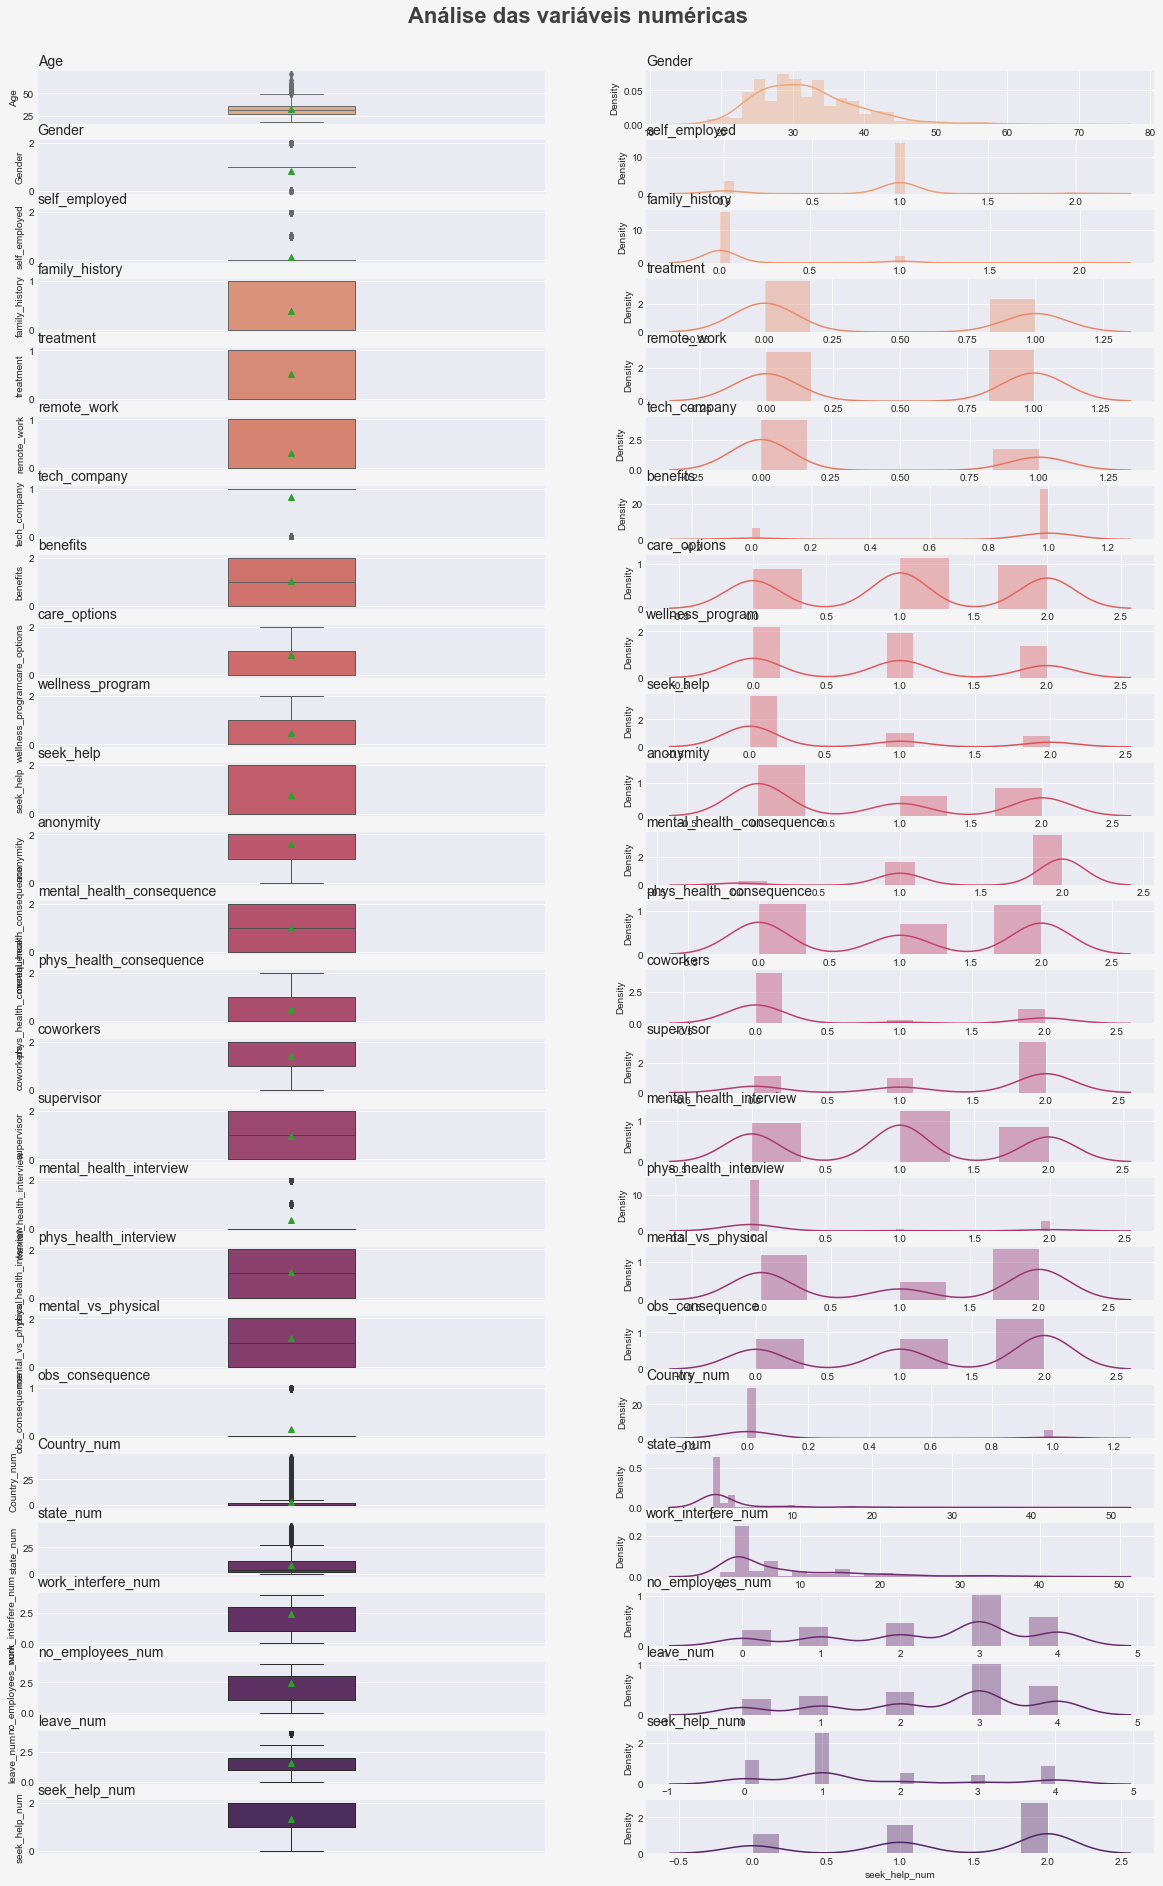

In [74]:
# Grid Gráficos

# Tamanho
Figura, Eixo = plt.subplots( figsize=(20, 30) )

# Cor de fundo
Cor_fundo = '#f5f5f5'
Figura.set_facecolor( Cor_fundo )

# Paleta de cores
paleta_cores = sns.color_palette('flare', len(numerical_columns) * 2)

# Título
plt.suptitle('Análise das variáveis numéricas', fontsize=22, color='#404040', fontweight=600)

# Estrutura 
linhas =  26 # (Todas as infos. numéricas)
colunas = 2 # (Boxplot - Distplot)
posicao = 1 # Posição inicial do Grid

#Loop para Plotar os dados
for coluna in numerical_columns:
    
    #Plot no Grid -- Boxplot
    # Título
    plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200)
    
    plt.subplot( linhas, colunas, posicao )
    
    #Boxplot
    sns.boxplot( data=features, y=coluna, showmeans=True, saturation=0.75, linewidth=1,\
                color=paleta_cores[posicao], width=0.25 )
    posicao += 1
        
    # Título
    plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200)

    # Plot no Grid -- Distplot
    plt.subplot( linhas, colunas, posicao )
    
    # Distplot
    sns.distplot( features[coluna], color=paleta_cores[posicao-1] )

    posicao += 1
    
# Ajuste de Grid
plt.subplots_adjust( top=0.95, hspace=0.3 )

In [76]:
features['Country_num'].value_counts()

0     751
2     185
1      72
10     45
17     27
6      27
9      21
4      13
18     10
26      8
8       7
7       7
21      7
20      7
19      6
25      6
13      6
31      5
34      4
3       4
16      3
29      3
12      3
11      3
40      2
42      2
22      2
37      2
5       2
43      1
44      1
41      1
45      1
39      1
46      1
38      1
24      1
36      1
35      1
33      1
32      1
30      1
28      1
27      1
23      1
15      1
14      1
47      1
Name: Country_num, dtype: int64

In [77]:
## Drop Country_num and state
features.drop(["Country_num"], axis=1, inplace=True)
features.drop(["state_num"], axis=1, inplace=True)

In [78]:
features.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'work_interfere_num',
       'no_employees_num', 'leave_num', 'seek_help_num'],
      dtype='object')

In [80]:
y = features['treatment']
X = features.drop(['treatment'], axis=1)

In [83]:
X.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'work_interfere_num',
       'no_employees_num', 'leave_num', 'seek_help_num'],
      dtype='object')

#### Correlação dos dados

In [84]:
features.corr()

,Age,Gender,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,work_interfere_num,no_employees_num,leave_num,seek_help_num
Age,1.000000,0.063175,0.069027,0.009103,0.073165,0.145461,-0.057668,-0.046428,0.012181,0.034519,0.036320,0.000802,0.036305,0.094140,-0.014859,-0.009119,-0.059614,-0.029038,-0.013077,0.070011,-0.036226,-0.036226,-0.000009,-0.156853
Gender,0.063175,1.000000,0.041868,-0.117551,-0.134297,0.015624,0.062883,-0.046936,-0.059618,-0.057196,-0.050854,0.006745,-0.067198,-0.037210,-0.005948,-0.003118,0.107103,0.101265,-0.028311,-0.014100,0.020695,0.020695,0.066019,0.040431
self_employed,0.069027,0.041868,1.000000,0.007830,0.015943,0.265288,0.079074,-0.165179,0.005232,-0.009507,-0.084777,-0.107663,-0.090871,-0.014153,0.006784,-0.002079,0.100055,0.041728,-0.034531,0.059935,-0.076510,-0.076510,0.094700,0.090377
family_history,0.009103,-0.117551,0.007830,1.000000,0.377918,0.014456,-0.046079,0.003541,0.010452,-0.018524,0.008627,-0.076809,0.061449,0.038976,-0.013811,-0.000416,-0.065201,-0.062747,-0.094343,0.124861,-0.144196,-0.144196,0.011632,-0.049393
treatment,0.073165,-0.134297,0.015943,0.377918,1.000000,0.026937,-0.031525,-0.095206,0.021324,-0.017388,-0.025326,-0.131448,0.089877,0.040135,0.021477,-0.010855,-0.088566,-0.036177,-0.117235,0.156972,-0.338003,-0.338003,0.062590,-0.051467
remote_work,0.145461,0.015624,0.265288,0.014456,0.026937,1.000000,0.131108,-0.037797,-0.020088,0.012462,-0.010980,0.008345,-0.055684,0.022505,0.018220,-0.025233,0.074701,0.037884,0.036538,-0.039065,-0.037966,-0.037966,0.095119,0.041537
tech_company,-0.057668,0.062883,0.079074,-0.046079,-0.031525,0.131108,1.000000,-0.041486,0.000352,-0.031858,-0.062480,0.061751,-0.102039,-0.070048,0.018057,0.016697,0.079750,0.027772,0.076191,-0.062347,0.032920,0.032920,0.033830,0.128357
benefits,-0.046428,-0.046936,-0.165179,0.003541,-0.095206,-0.037797,-0.041486,1.000000,0.229613,0.240593,0.408048,0.248869,-0.005350,-0.096849,0.071192,-0.016870,0.019712,0.001610,0.177691,-0.111243,0.081203,0.081203,-0.093878,-0.207014
care_options,0.012181,-0.059618,0.005232,0.010452,0.021324,-0.020088,0.000352,0.229613,1.000000,0.261628,0.251500,0.032551,-0.037746,-0.002238,0.033948,0.093730,0.004062,-0.030221,0.038692,-0.018967,-0.010231,-0.010231,0.013526,-0.233778
wellness_program,0.034519,-0.057196,-0.009507,-0.018524,-0.017388,0.012462,-0.031858,0.240593,0.261628,1.000000,0.472868,0.014044,-0.100071,-0.045012,0.058339,0.101564,0.065797,-0.061410,0.100025,-0.034676,0.035645,0.035645,-0.008681,-0.464958


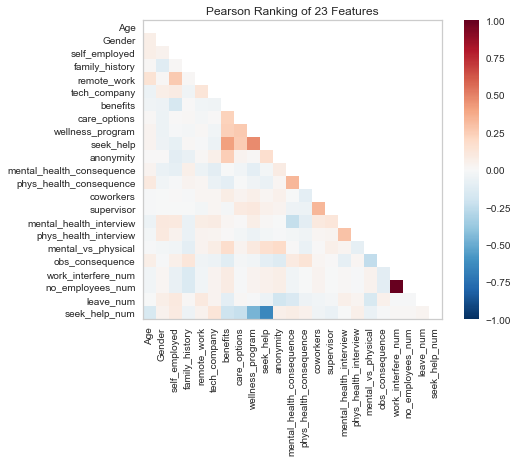

In [88]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o modelo
correlacao = Rank2D( algoritmo='pearson' )

# Filtrar função
correlacao.fit( X, y )
correlacao.transform( X )
correlacao.show();
